In [1]:
# Importing the important packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

# Step1: Data Collection 

In [2]:
# This is the original data of cryptocurrency that has been collected from the Kaggle Repository. 
# In our research, we have taken Ethereum & ADA Cardano coins to better understand the forecasting using 
# AutoRegressive Integrated Moving Average (ARIMA) which is a supervised machine learning technique for non-linear regression data.
# Machine Learning technique. Ethereum and ADA Cardano are both comparatively very stable and popular coins with
# high investment.
df = pd.read_csv("ETH-USD.csv")

# Step2: Data Preparation

In [3]:
# We need to prepare the data for the Machine Learning model.It is a Regression case where the dependent variable
# i.e. Y (output) is qualitative.Therefore, we need to prepare our csv file for the Regression algorithm.


In [7]:
#print(df)
df['adjclose']

0        320.884003
1        299.252991
2        314.681000
3        307.907989
4        316.716003
           ...     
1780    1317.993286
1781    1294.216797
1782    1335.320190
1783    1330.127686
1784    1281.931763
Name: adjclose, Length: 1785, dtype: float64

In [8]:
# Data Cleaning: 
# In the CSV(Comma Separated Values) file of each coin,we can see that there are 7 features in total, indicating
# the coin timestamp(in 24 hrs), adjusted close,open(coin ),high,volume,low and close .Out of these features,
# the "Adjusted Close" has been considered as the dependent Variable (Y).

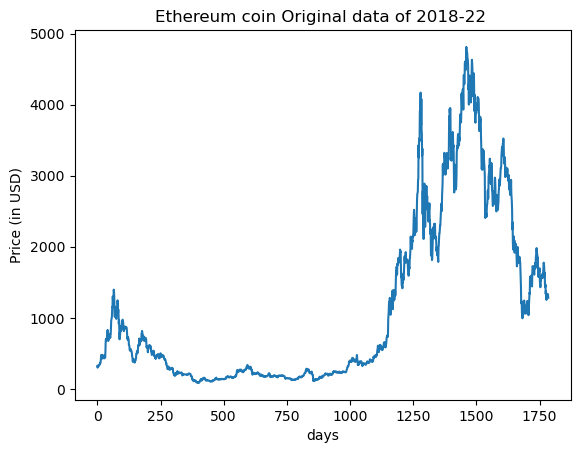

In [9]:

plt.plot(df.index, df['adjclose'])
plt.title('Ethereum coin Original data of 2018-22 ')
plt.xlabel('days')
plt.ylabel('Price (in USD)')
plt.show()

In [10]:
# Feature Selection:
# Since it is a Time-Series Analysis problem, where the Y (output) is dependent only on time.
#Therefore,the 'timestamp' feature is considered as the only independent variable 'x'.
# The 'Adjusted close' column is treated as the dependent variable "Y" or the predictor variable.
  
# Converting the'x'variable i.e. the Days column in to date-time format, to be treated as the index of Y here.
df['timestamp'] = pd.to_datetime(df["timestamp"])
df.set_index('timestamp', inplace = True)


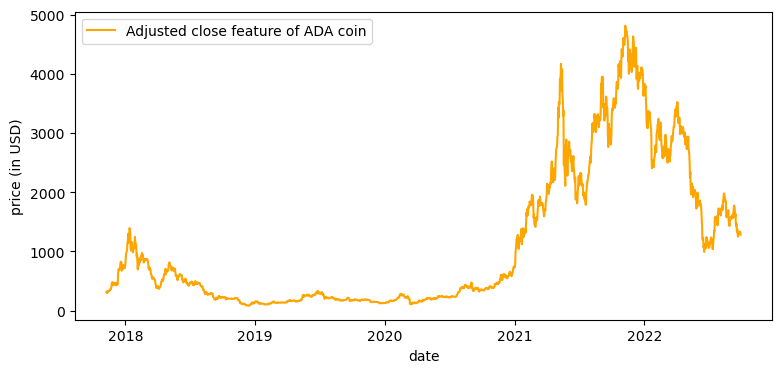

In [11]:
plt.figure(figsize=(9,4))
plt.plot(df['adjclose'],color='orange', label= 'Adjusted close feature of ADA coin')
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

# Step 3: Exploratory Data Analysis(EDA)

Text(0, 0.5, 'price (in USD)')

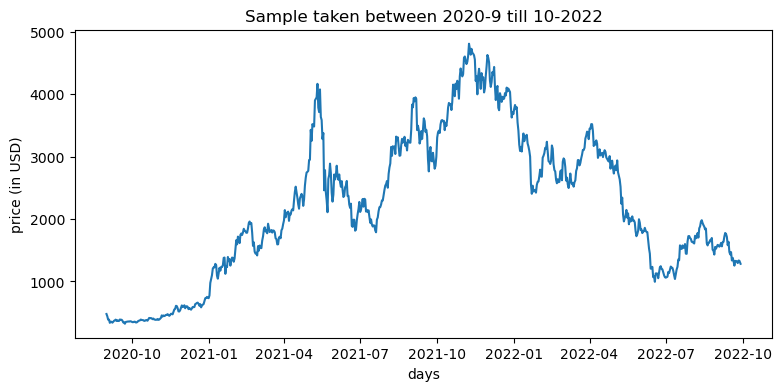

In [12]:
# Step 1: Feature Engineering
# The dependent variable (Y) is taken as a sample, starting from 2020-01 till the end date i.e. 28-09-2022.
# Because we can examine that from 2018 till 12-2019, the data is almost stationary which may not contribute much in the
# forecasting and thus,causes overfitting.Whereas, from 2020 till 9-2022, the data is juggling,which is suitable for
# the model fitting and that contributes better to behave consistantly in prediction with the recent trend.
plt.figure(figsize=(9,4))
df = df.loc['2020-9' : '2022']
plt.plot(df['adjclose'])
plt.title("Sample taken between 2020-9 till 10-2022" )
plt.xlabel("days")
plt.ylabel("price (in USD)")

In [13]:
# Dataset with date index (X - independent variable)
df['adjclose']

timestamp
2020-09-01 00:00:00     477.051910
2020-09-02 00:00:00     440.040497
2020-09-03 00:00:00     385.671936
2020-09-04 00:00:00     388.241150
2020-09-05 00:00:00     335.260071
                          ...     
2022-09-24 00:00:00    1317.993286
2022-09-25 00:00:00    1294.216797
2022-09-26 00:00:00    1335.320190
2022-09-27 00:00:00    1330.127686
2022-09-28 08:54:00    1281.931763
Name: adjclose, Length: 758, dtype: float64

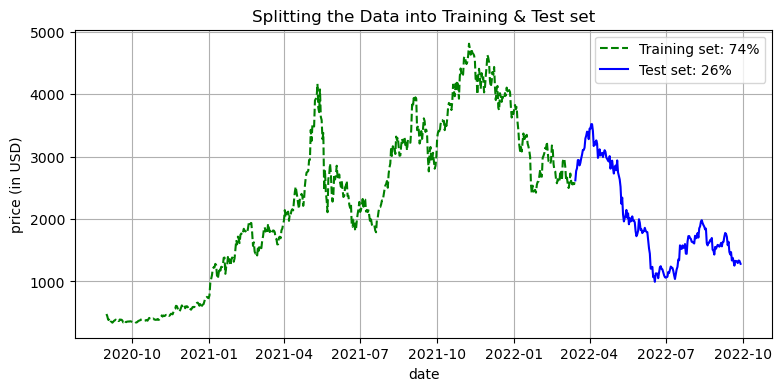

In [14]:
#step1: Feature Engineering/Variable Engineering:
# By analyzing the data graphically, we have divided the selected data (i.e. 9-2020 till 9-2022) sequentially into
# two samples i.e. training set and test. The initial 74% data is treated as our training set which has been used to 
# train the machine learning model/algorithm.While the remaining 26% data is taken as the test set which is used to 
# assess the performance of the trained model and to provide the estimation to the test error.

plt.figure(figsize=(9,4))
plt.grid(True)
to_row = int(len(df)*0.74)
training_data = list(df[0:to_row]['adjclose'])
testing_data = list(df[to_row:]['adjclose'])
plt.plot(df[0:to_row]['adjclose'],color='green', label= 'Training set: 74%',linestyle ='dashed')
plt.plot(df[to_row:]['adjclose'],color='blue', label= 'Test set: 26%')
plt.title("Splitting the Data into Training & Test set")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

In [15]:
# Step 2: After the data is splitted into training set and test set,we need to check the stationarity 
# of the training set since it will be used to train the Machine Learning model.


In [16]:
# Testing for Stationarity of training set:
# Method1: 
# For checking the stationarity of training set, we have used (Augmented Dicky Fuller), also called Adfuller test.
# Using Dicky fuller test, the hypothesis testing with p-value= 0.05 is computed by considering the Null hypothesis(H0) as non-stationary
# and Alternate hypothesis (H1),representing the training data as stationary.
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(training_data)

In [17]:
# Hypothesis Testing

# H0  = The training dataset is non- stationary
# H1  = The training dataset is Stationary
def adfuller_test(adjclose):
    result=adfuller(adjclose)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
# Adfuller test result:
adfuller_test(training_data)

ADF Test Statistic : -1.6756338922080647
p-value : 0.4437083231214805
#Lags Used : 6
Number of Observations Used : 553
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
# Since the training set is Non-stationary, therefore,we need to make it stationary by taking the differentiation of 
# data with different orders i.e. the value 'q' of the ARIMA Model,until it becomes stationary.
# It can also be done with Auto-ARIMA or by visualizing the Auto-Correlation Function(ACF plot) having different differentiation orders of the data.

In [20]:
# Making the training set stationary by taking the first order difference
df['First Difference'] = df['adjclose'] - df['adjclose'].shift(1)

In [21]:
# Checking for 1 shift
df['First Difference']

timestamp
2020-09-01 00:00:00          NaN
2020-09-02 00:00:00   -37.011414
2020-09-03 00:00:00   -54.368561
2020-09-04 00:00:00     2.569214
2020-09-05 00:00:00   -52.981079
                         ...    
2022-09-24 00:00:00   -10.266235
2022-09-25 00:00:00   -23.776489
2022-09-26 00:00:00    41.103393
2022-09-27 00:00:00    -5.192504
2022-09-28 08:54:00   -48.195923
Name: First Difference, Length: 758, dtype: float64

In [22]:
# Removing the 'Nan' values and Applying the adfuller test to check for the P-value 
adfuller_test(df['First Difference'].dropna())
# Since the training set became stationary after taking the first order difference since the p value is became increased,therefore we may set the d value of ARIMA model as 1.

ADF Test Statistic : -10.475760337927802
p-value : 1.2503084229750067e-18
#Lags Used : 5
Number of Observations Used : 751
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


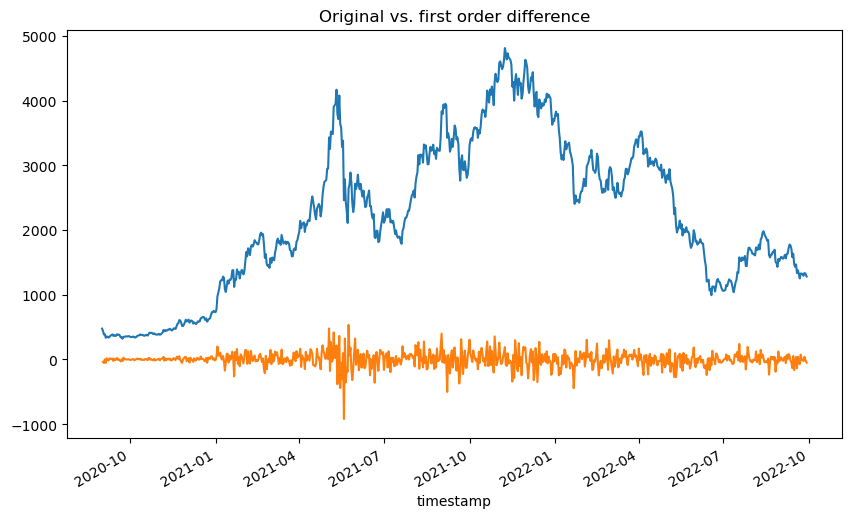

In [23]:
# Visualizing the Stationarity 
plt.figure(figsize=(10,6))
plt.title("Original vs. first order difference")
df['adjclose'].plot()
#df['First Difference'].plot()
#plt.plot(df['adjclose'], label = 'original')
plt.plot(df['First Difference'], label ='stationary with 1st order ')

In [24]:
# Before applying the ARIMA model,we need to analyze the data and find out the 3 parameters of ARIMA model
# which are (AR, I, MA) also called (P,d,q), where 'p' is called Auto-Regressive, 'd' is the Integrated part which is the order of difference to make the data stationary
# and 'q' is called the Moving-Average.


In [25]:
# Method 1: Using Auto-ARIMA technique to find the value of (p,d,q). In Auto ARIMA, the model itself will generate 
#the optimal p, d, and q values which would be suitable for the data set to provide better prediction.
# This technique computes the optimal value of p, d, and q by using different combinations and the final values
#would be determined with the lower AIC(Akaike information criterion (AIC)), BIC(Bayesian information criterion)
# parameters taking into consideration.


# Finding the order of the ARIMA model i.e. to identify the P,d,q values by using Auto-ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [26]:
step_wise_fit = auto_arima(list(df[0:to_row]['adjclose']), trace=True, suppress_warnings=True)
# Here we can see that the order(p,d,q)=(1,1,1) is having lower AIC score that is -923 compared to other orders
# Hence, the AutoARIMA technique recommended this order as the 'best model' which is depicted in the result.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7022.574, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7024.814, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7023.510, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7023.546, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7023.293, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7027.540, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7027.512, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7024.327, Time=1.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7015.319, Time=1.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7026.854, Time=0.70 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=7023.979, Time=1.59 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=7017.291, Time=1.96 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=7023.440, Time=1.30 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=7023.255, Time=1.92 sec
 ARIMA(2,1,3)(0,0,0)[0]          

In [27]:
# Method 2 : To find the order of ARIMA model i.e.(p,d,q), the 3 parameters value for better forecasting is by 
#  visualizing the Partial Auto-Correlation (PACF) and ACF(Auto-Correlation Function) plot to choose the value of 'P' (Auto-Regression)
# 'd'(Integration) and "q"(Moving-Average) value respectively.

In [28]:
# Determining the (p,d,q) values for ARIMA using Auto-Correlation Function and Partial Auto-Correlation Function
from statsmodels.graphics.tsaplots import plot_acf

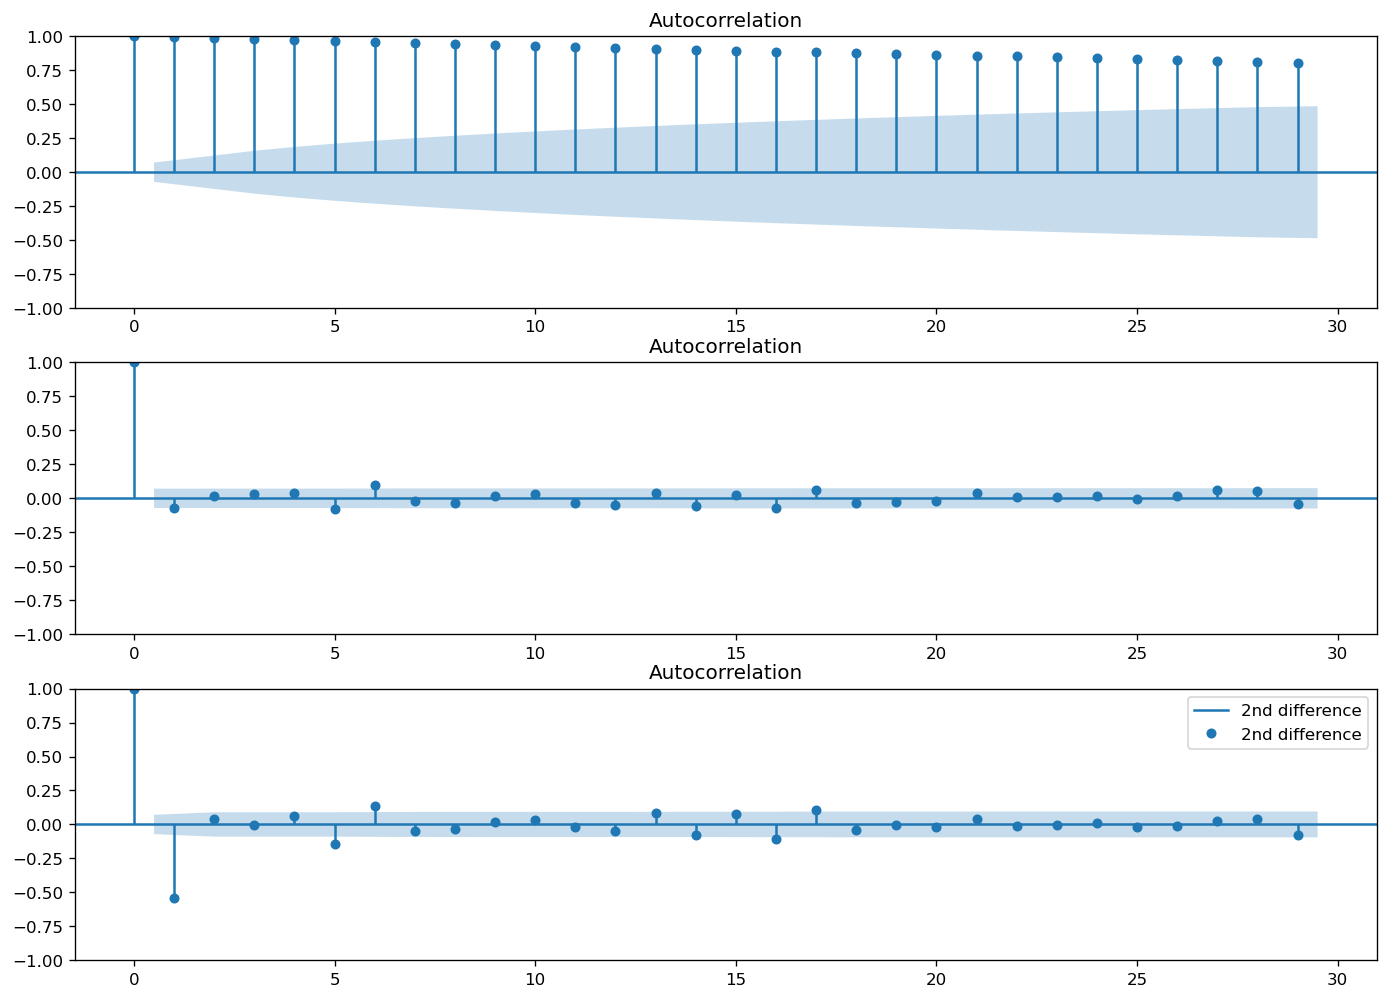

In [29]:
# checking the differencing "D" with Auto-Correlation Function(ACF)
plt.rcParams.update({'figure.figsize':(14,10), 'figure.dpi':120})
fig, (ax1, ax2, ax3) = plt.subplots(3)

plot_acf(df['adjclose'], ax=ax1, label='Actual data')

plot_acf(df['adjclose'].diff().dropna(), ax=ax2, label = '1st difference')

plot_acf(df['adjclose'].diff().diff().dropna(), ax=ax3, label = '2nd difference')
plt.legend()
plt.show()

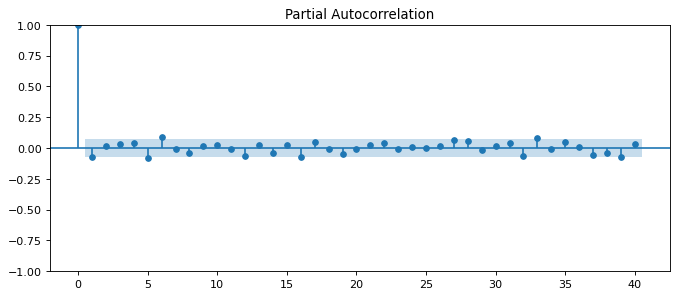

In [30]:
# Partial AutoCorrelation graph (PACF) to check for AutoRegresive(P) and Moving value(q) for the ARIMA model
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':80})
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.adjclose.diff().dropna(),lags = 40)
plt.show()

In [31]:
# After visualizing with ACF and PACF graph , we may set the ARIMA orders as (p,d,q) = (1,1,1)

# Step 4: Machine Learning Model Selection

In [32]:
# We have applied the ARIMA(Auto-Regressive Integrated Moving Average) model with the orders (p,d,q) as (1,1,1) for the forecasting. ARIMA is a supervised learning
# algorithm used for the Regression and time-series analysis where the univariate data(Y) is dependent only on the time (X).

In [33]:
# fitting the ARIMA Model with the order(2,1,3) on the previous 74% data as a training set and then testing the models
# by comparing the test dataset (remaining 26% data) with the model predictions.
# numbers 
model_predictions = []
n_test_obser = len(testing_data)
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (2,1,3))
    model_fit = model.fit()
    #output =model_fit.forecast(steps = 120)
    output = model_fit.forecast()
    y_hat = np.array(output[0])
    model_predictions.append(y_hat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [35]:
# Actual vs Predicted values
testing_data = np.round(testing_data[:], 4)
model_predictions= np.round(model_predictions[:],4)
testing_data = np.array(testing_data).reshape(-1,1)

data = pd.DataFrame(testing_data)
data["Predicted Values"] = model_predictions
data.head(10)

,0,Predicted Values
0,2620.1497,2613.0166
1,2772.0557,2597.5062
2,2814.8545,2776.7801
3,2945.3430,2808.0972
4,2946.2571,2931.4056
5,2860.4592,2962.4337
6,2897.9766,2838.7963
7,2973.1311,2928.1015
8,3031.0671,2936.6693
9,3108.0620,3057.6463


In [36]:
data.tail(10)

,0,Predicted Values
188,1377.5414,1334.6606
189,1324.3882,1381.7810
190,1252.6078,1331.0494
191,1327.6802,1247.4687
192,1328.2595,1323.8779
193,1317.9933,1333.0184
194,1294.2168,1314.2536
195,1335.3202,1308.3607
196,1330.1277,1321.3317
197,1281.9318,1333.7692


In [37]:
# Comparing the first 50 actual and predicted values
a = testing_data[:50].reshape(5,-1)
print("ACTUAL VALUES\n", a)

ACTUAL VALUES
 [[2620.1497 2772.0557 2814.8545 2945.343  2946.2571 2860.4592 2897.9766
  2973.1311 3031.0671 3108.062 ]
 [3106.6714 3143.179  3291.5776 3336.6345 3401.9878 3385.158  3281.6428
  3449.5522 3445.0593 3522.8335]
 [3521.2412 3411.7925 3171.6919 3233.2747 3192.074  3261.9163 3211.8669
  2981.0522 3030.3765 3118.3442]
 [3019.9094 3040.9165 3062.3103 2993.4033 3057.6067 3104.1064 3077.7458
  2987.4807 2964.8357 2938.114 ]
 [2922.7327 3009.3936 2808.2983 2888.9297 2936.9409 2815.6018 2730.1868
  2827.7561 2857.4104 2783.4763]]


In [38]:
print("Predicted Values\n",model_predictions[:50] )

Predicted Values
 [2613.0166 2597.5062 2776.7801 2808.0972 2931.4056 2962.4337 2838.7963
 2928.1015 2936.6693 3057.6463 3078.8717 3124.059  3131.437  3286.3003
 3340.0186 3383.709  3407.3013 3259.7584 3470.415  3419.147  3536.2401
 3513.3744 3414.2851 3196.75   3210.2464 3223.517  3222.8102 3253.0334
 2954.002  3062.391  3090.4101 3035.9008 3040.1367 3051.7907 3014.1204
 3031.068  3129.4615 3048.8835 3020.6377 2942.5546 2957.9502 2912.7005
 3007.6783 2824.9675 2870.216  2958.9021 2790.1071 2770.3246 2790.4323
 2882.9988]


In [39]:
# Comparing the first 10 Actual and Predicted values

In [40]:
a = testing_data[:10].reshape(5,-1)
print("ACTUAL VALUES\n", a)

ACTUAL VALUES
 [[2620.1497 2772.0557]
 [2814.8545 2945.343 ]
 [2946.2571 2860.4592]
 [2897.9766 2973.1311]
 [3031.0671 3108.062 ]]


In [41]:
print("Predicted Values\n",model_predictions[:10] )

Predicted Values
 [2613.0166 2597.5062 2776.7801 2808.0972 2931.4056 2962.4337 2838.7963
 2928.1015 2936.6693 3057.6463]


# Step5: Model Validation

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


#Method 1: Using R2 SCORE
print("Computing the R-squared value:")
r2_score = r2_score(testing_data,model_predictions[:])
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:0.984282042145777


In [43]:
# Method2: Report performance check with MEAN ABSOLUTE PERCENTAGE ERROR
MAPE = np.mean(np.abs(np.array(model_predictions[:]) - np.array(testing_data)) / np.abs(testing_data))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.432546387135121


In [44]:
# Method3: Using MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(model_predictions[:],testing_data)
print(f'Mean_Absolute_Error:{MAE}')

Mean_Absolute_Error:66.96731464646466


In [46]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(model_predictions[:],testing_data)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

90.0207683832254


# Step6: Visualization of Results

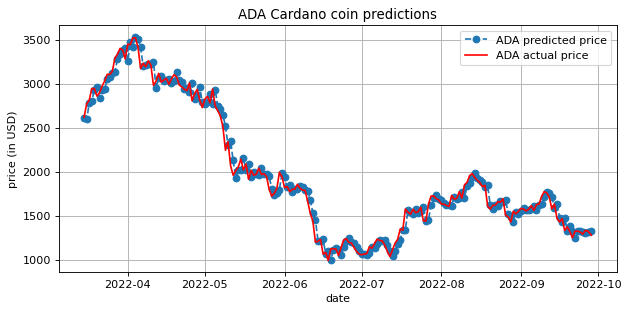

In [47]:
plt.figure(figsize=(9,4))
plt.grid(True)
date_range = df[to_row:].index
#plt.plot(date_range, model_predictions[:-1],color='blue',marker='o',linestyle ='dashed',label = "ADA predicted price")
plt.plot(date_range,model_predictions[:],marker='o',linestyle ='dashed',label = "ADA predicted price")
plt.plot(date_range,testing_data,color='red',label = "ADA actual price")
plt.title("ADA Cardano coin predictions")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.tight_layout
plt.show()

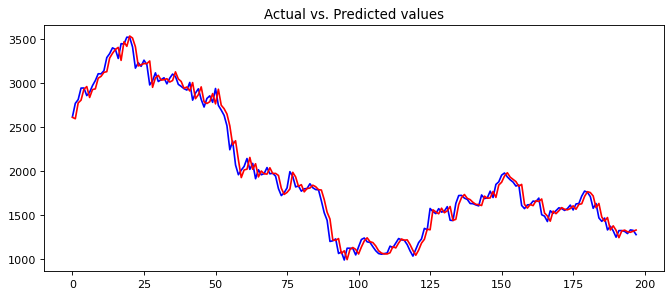

In [48]:
# Actual values Vs. Predicted Values
plt.plot(testing_data,color='blue')
plt.plot(model_predictions,color='red')
plt.title("Actual vs. Predicted values")
plt.show()

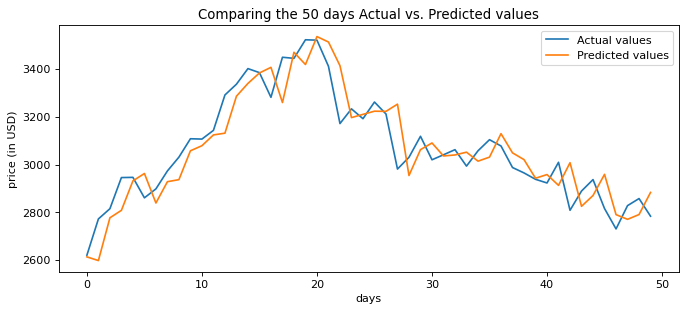

In [49]:
plt.plot(testing_data[:50],label = 'Actual values')
plt.plot(model_predictions[:50], label = 'Predicted values')
plt.title('Comparing the 50 days Actual vs. Predicted values')
plt.xlabel('days')
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

In [50]:
# from statsmodels.graphics.tsaplots import plot_predict
# from statsmodels.tsa.arima.model import ARIMA

# plt.figure(figsize=(9,4))
# plot_predict(1,800)
# plt.title('Depicting the next forecasting range with 95% Confidence interval')
# plt.xlabel('Days')
# plt.ylabel('price (in USD)')
# plt.show()

# Step7: Forecasting of the next 10 days

In [51]:
# future_days = model_fit.forecast(steps=10)
# print(future_days)

In [52]:
data.head(10)

,0,Predicted Values
0,2620.1497,2613.0166
1,2772.0557,2597.5062
2,2814.8545,2776.7801
3,2945.3430,2808.0972
4,2946.2571,2931.4056
5,2860.4592,2962.4337
6,2897.9766,2838.7963
7,2973.1311,2928.1015
8,3031.0671,2936.6693
9,3108.0620,3057.6463


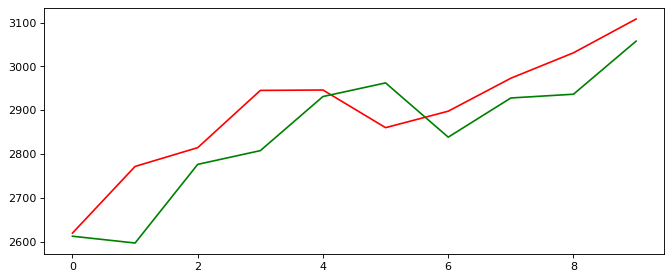

In [53]:
Actual = testing_data[:10]
predicted = model_predictions[:10]
plt.plot(Actual, color='red')
plt.plot(predicted,color = 'green')

In [54]:
# performance Evaluation of 10 days Predictions

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Computing the R-squared value:")
r2_score = r2_score(Actual,predicted)
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:0.5478850104519619


In [56]:
# report performance
MAPE = np.mean(np.abs(np.array(predicted) - np.array(Actual)) / np.abs(Actual))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.05466799215192542


In [57]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Actual, predicted)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

88.54744748265757


In [58]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Actual,predicted))

72.28521999999998
